# Tugas EDA + Model Klasifikasi

### Kelompok 6 

Alfen Fajri Nurulhaq (2201431)

Daffa Fakhry Ansory ()

Jidan Abdurahman Aufan (2205422)

Muhammad Rifky Affandi (2202346)

Adri Sapta Firmansyah (2205361)

## Alur Notebook

Notebook ini pertama - tama akan melakukan EDA untuk mencari masalah - masalah yang ada di dataset, selanjutnya akan dicoba membuat model-model secara iteratif untuk setiap penanganan masalah dan mencatat kinerja tiap model

## Dataset

Dataset yang digunakan adalah Non-Performing Loan

Berikut attribut dataset dan penjelasannya:

X : Penomoran (index)

jumlah_kartu: Jumlah Kartu Kredit yang dimiliki nasabah

outstanding: Jumlah hutang yang harus dibayar oleh nasabah dalam Rupiah

limit_kredit: Batas kredit yang diberikan kepada nasabah oleh lembaga keuangan dalam Rupiah

tagihan : Total tagihan yang harus dibayar oleh nasabah pada periode tertentu misal perbulan

total_pemakaian_tunai : Total uang tunai yang ditarik dari kartu kredit

total_pemakaian_retail : Total Penggunaan kartu kredit untuk transaksi ritel

sisa_tagihan_tidak_terbayar: Jumlah tagihan yang belum terbayar oleh nasabah

kode_cabang : Kode yang mewakili cabang atau lokasi lembaga keuangan

rasio_pembayaran : Rasio Pembayaran tagihan terhadap tagihan total

persentasi_overlimit : Persentase penggunaan kartu kredit melebihi batas kredit

rasio_pembayaran_3bulan : Rasio pembayaran tagihan selama tiga bulan terakhir 

rasio_pembayaran_6bulan : Rasio pembayaran tagihan selama enam bulan terakhir

skor_delikuensi : Skor yang mengindikasikan resiko kredit nasabah

flag_kredit_macet : Ini merupakan kelas yang kita prediksi, apakah kredit macet atau tidak 0 untuk tidak macet dan 1 untuk macet

jumlah_tahun_sejak_pembukaan_kredit : Jumlah tahun sejak nasabah membuka kredit

total_pemakaian: Total penggunaan kartu kredit(termasuk tunai dan ritel)

sisa_tagihan_per_jumlah_kartu: Rata - rata sisa tagihan per jumlah kartu kredit

sisa_tagihan_per_limit: Rata-rata sisa tagihan per batas kredit

total_pemakaian_per_limit: Rata-rata total pemakaian per batas kredit

pemakaian_3bln_per_limit: Rata- rata pemakaian dalam tiga bulan terakhir 

pemakaian_6bln_per_limit: Rata- rata pemakaian dalam enam bulan terakhir per batas kredit

utilisasi_3bulan: Persentase pemakaian dalam tiga bulan terakhir

utilisasi_6bulan: Persentase pemakaian dalm enam bulan terakhir 

## Import Library Yang Diperlukan

In [1]:
# display
%matplotlib inline  
# numerik
import numpy as np 
# analisis
import pandas as pd 
# plot
import matplotlib.pyplot as plt  
# visualisasi
import seaborn as sns

## Membaca Data Train

In [2]:
df_train = pd.read_csv('npl_train.txt')

## Copy Data Original

Membuat salinan data latih (train) sehingga meskipun kita harus membuat perubahan apa pun pada set data ini, kita tidak akan kehilangan set data asli.

In [3]:
train_original = df_train.copy()

# Eksplorasi Data & Analisis

## Data Understanding

Pada bagian ini, kita akan melihat struktur dataset. Pertama, kita akan memeriksa fitur-fitur yang ada di data kita dan kemudian kita akan melihat tipe datany

In [4]:
df_train.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

Pertama kita lihat terlebih dahulu ada atribut apa saja di data ini bertipe apa , selanjutnya kita akan cek apakah ada null di dalam atribut -  atribut tersebut

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

## Print tipe data

In [6]:
df_train.dtypes

X                                        int64
jumlah_kartu                             int64
outstanding                              int64
limit_kredit                           float64
tagihan                                float64
total_pemakaian_tunai                  float64
total_pemakaian_retail                 float64
sisa_tagihan_tidak_terbayar            float64
kode_cabang                             object
rasio_pembayaran                       float64
persentasi_overlimit                   float64
rasio_pembayaran_3bulan                float64
rasio_pembayaran_6bulan                float64
skor_delikuensi                          int64
flag_kredit_macet                        int64
jumlah_tahun_sejak_pembukaan_kredit    float64
total_pemakaian                        float64
sisa_tagihan_per_jumlah_kartu          float64
sisa_tagihan_per_limit                 float64
total_pemakaian_per_limit              float64
pemakaian_3bln_per_limit               float64
pemakaian_6bl

## Dimensi dataset

In [7]:
print('Dimensi Training Data: ', df_train.shape)
df_train.head()

Dimensi Training Data:  (15493, 24)


,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


## Menampilkan Data NULL

In [8]:
df_train.isna().sum()

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

Ternyata ada atribut yaitu kode_cabang yang bertipe objek dan ada 100 data yang null di atribut tersebut (Masalah 1)

### Mengecek Keseimbangan Data

In [9]:
df_train['flag_kredit_macet'].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

Ternyata ada ketimpangan data dimana ada lebih banyak record kredit tidak macet (Masalah 2)

## Mencari attribut yang mempengaruhi Non-Performing Loan

Kita dapat mencari attribut yang mempengaruhi NPL dengan melihat korelasi antar-attribut, atau dengan hipotesis, ataupun melihat feature importance setelah membuat model (ada di bawah)

### Mencari Korelasi antar atribut

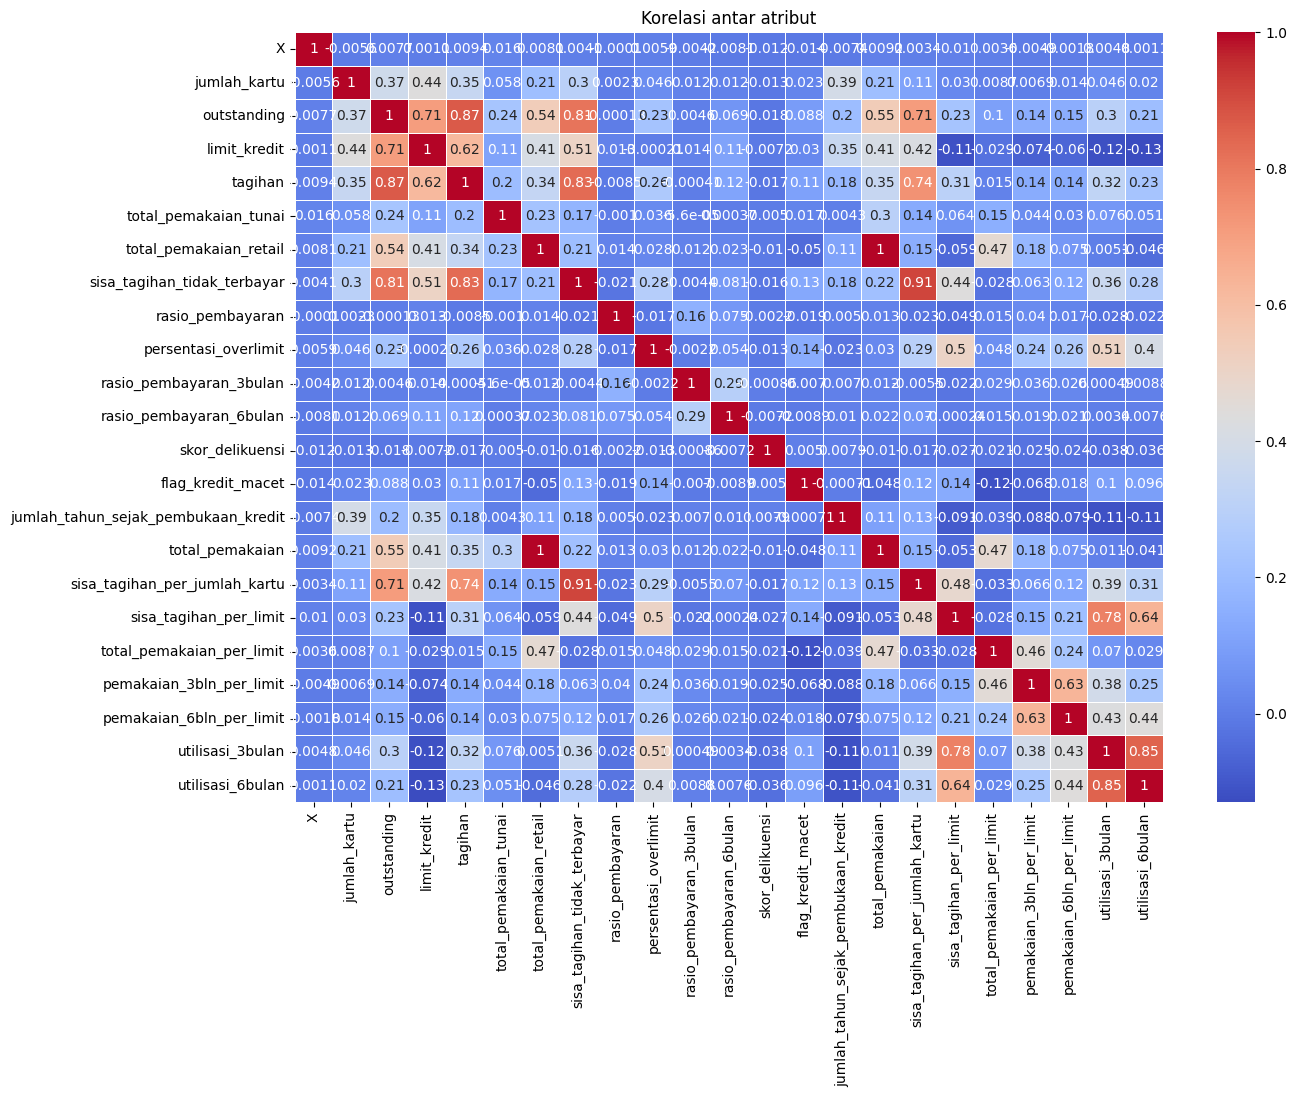

In [10]:
correlation_matrix = df_train.corr()

# Plot Heatmap Korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Korelasi antar atribut')
plt.show()

Hipotesis: Semakin lama mempunyai kredit, semakin sedikit kemungkinan kredit macet

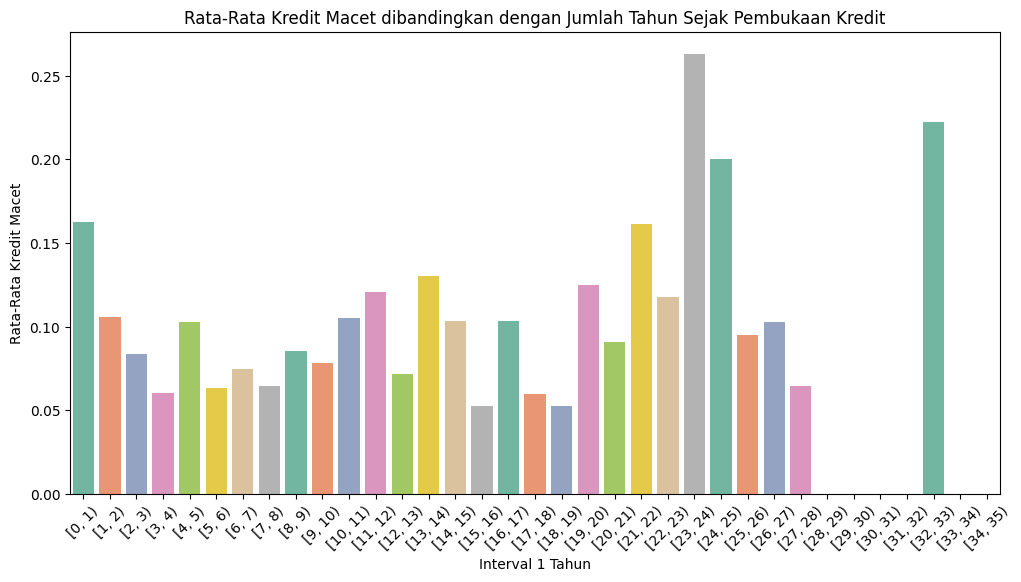

In [11]:
intervals = range(0, round(df_train['jumlah_tahun_sejak_pembukaan_kredit'].max() + 2), 1)

# Group entries into intervals and calculate the sum of credit delinquencies in each interval
grouped = df_train.groupby(pd.cut(df_train['jumlah_tahun_sejak_pembukaan_kredit'], intervals, right=False))['flag_kredit_macet'].sum().reset_index()

# Rename the columns for clarity
grouped.columns = ['Interval', 'Jumlah_Kredit_Macet']

# Calculate the total number of records in each interval
record_counts = df_train.groupby(pd.cut(df_train['jumlah_tahun_sejak_pembukaan_kredit'], intervals, right=False)).size().reset_index()
record_counts.columns = ['Interval', 'Jumlah_Record']

# Merge the two DataFrames
result = pd.merge(grouped, record_counts, on='Interval')

# Calculate the average credit delinquency rate per interval
result['Rata_Rata_Kredit_Macet'] = result['Jumlah_Kredit_Macet'] / result['Jumlah_Record']

# result
# Convert the Interval objects to string for the x-axis labels
result['Interval'] = result['Interval'].astype(str)

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='Interval', y='Rata_Rata_Kredit_Macet', palette='Set2')
plt.title('Rata-Rata Kredit Macet dibandingkan dengan Jumlah Tahun Sejak Pembukaan Kredit')
plt.xlabel('Interval 1 Tahun')
plt.ylabel('Rata-Rata Kredit Macet')
plt.xticks(rotation=45)
plt.show()

Terlihat bahwa ternyata hipotesis di atas salah, karena tidak terlihat tren penurunan kejadian kredit macet semakin lama memiliki kredit

In [12]:
# # konfirmasi plot
# coba = df_train[df_train["jumlah_tahun_sejak_pembukaan_kredit"] < 1]
# coba['flag_kredit_macet'].value_counts()[1] / (coba['flag_kredit_macet'].value_counts()[0] + coba['flag_kredit_macet'].value_counts()[1]) 
# # oke bener


kami ingin melihat untuk tagihan dan hutang yang mempengaruhi kredit macet

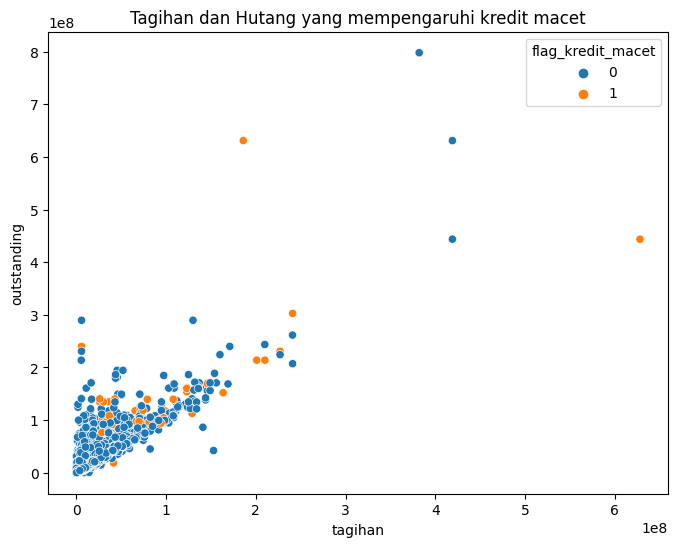

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='tagihan', y='outstanding', hue='flag_kredit_macet')
plt.title('Tagihan dan Hutang yang mempengaruhi kredit macet')
plt.show()

### Melihat tingkat kredit macet per cabang

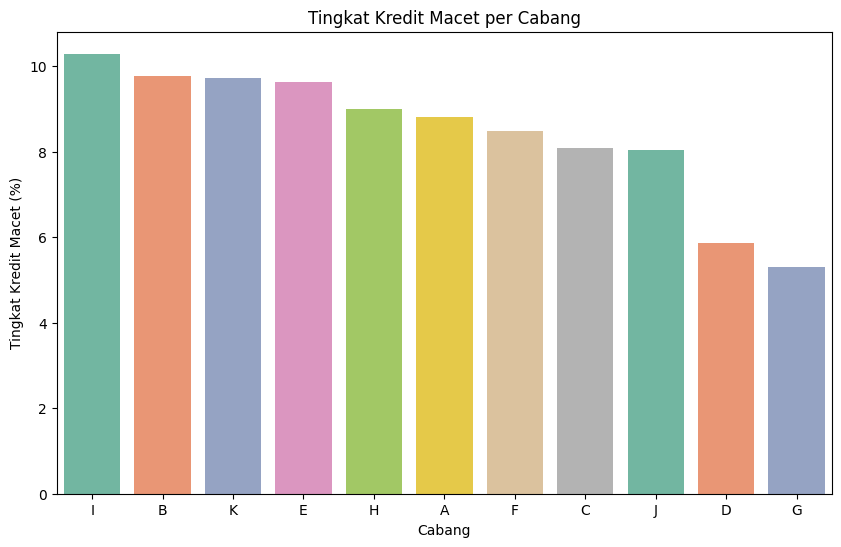

In [14]:
npl_rate = df_train.groupby('kode_cabang')['flag_kredit_macet'].mean().reset_index()
npl_rate['flag_kredit_macet'] = npl_rate['flag_kredit_macet'] * 100  # Convert to percentage
npl_rate
npl_rate = npl_rate.sort_values(by='flag_kredit_macet', ascending=False)
# Plot NPL rates using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=npl_rate, x='kode_cabang', y='flag_kredit_macet', palette='Set2')
plt.title('Tingkat Kredit Macet per Cabang')
plt.xlabel('Cabang')
plt.ylabel('Tingkat Kredit Macet (%)')
plt.show()

Dapat dilihat distribusi persentase terjadinya kredit macet di setiap cabang, perbedaan tingkat kredit macet mungkin dapat terjadi dikarenakan di daerah cabang tersebut memiliki demografi yang lebih berperilaku secara bijak dalam urusan keuangan

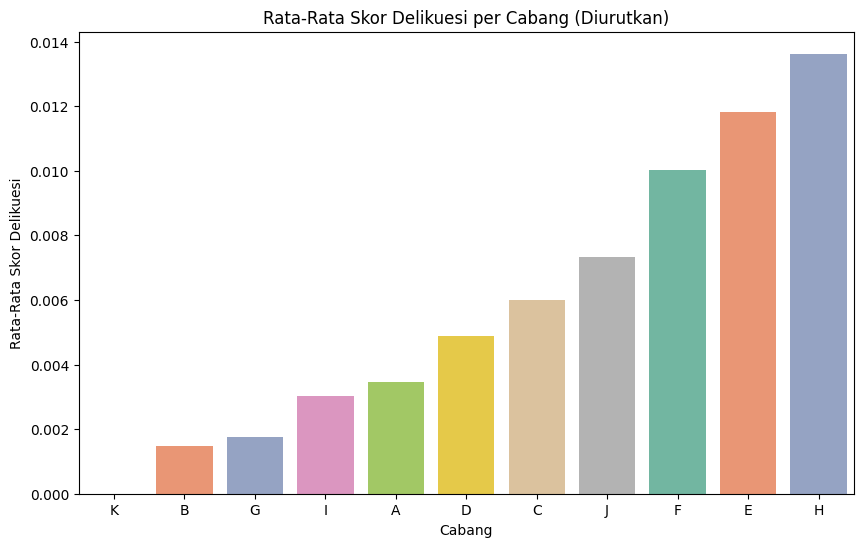

In [15]:
# Group data by 'kode_cabang' and calculate the average delinquency score
average_delinquency_per_cabang = df_train.groupby('kode_cabang')['skor_delikuensi'].mean().reset_index()

# Sort the DataFrame by average delinquency score in descending order
average_delinquency_per_cabang = average_delinquency_per_cabang.sort_values(by='skor_delikuensi', ascending=True)

# Plot the average delinquency score using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=average_delinquency_per_cabang, x='kode_cabang', y='skor_delikuensi', palette='Set2')
plt.title('Rata-Rata Skor Delikuesi per Cabang (Diurutkan)')
plt.xlabel('Cabang')
plt.ylabel('Rata-Rata Skor Delikuesi')
plt.show()


Tetapi jika dikelompokkan dan dilihat melalui skor delikuensi nya, tidak mendukung hipotesis di atas, contohnya cabang K dan B memiliki skor delikuensi rendah, tetapi sebelumnya terlihat bahwa K dan B memiliki kejadian kredit macet yang banyak

Melihat rata-rata limit kredit per cabang, mungkin jika tinggi cabang tersebut ada di kota?

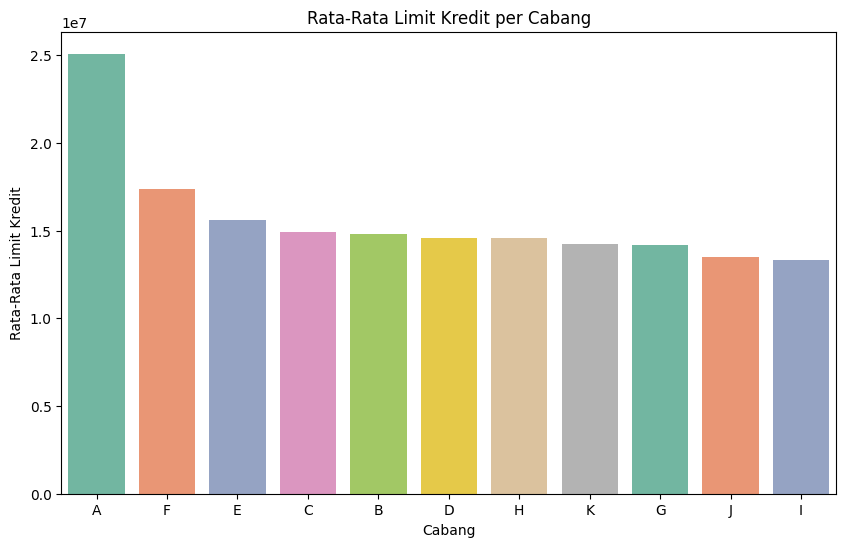

In [16]:
average_limit_per_cabang = df_train.groupby('kode_cabang')['limit_kredit'].mean().reset_index()
average_limit_per_cabang = average_limit_per_cabang.sort_values(by='limit_kredit', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_limit_per_cabang, x='kode_cabang', y='limit_kredit', palette='Set2')
plt.title('Rata-Rata Limit Kredit per Cabang')
plt.xlabel('Cabang')
plt.ylabel('Rata-Rata Limit Kredit')
plt.show()

In [17]:
# buktiin bener plot nya 
# coba = df_train[df_train['kode_cabang'] == 'A']
# coba['flag_kredit_macet'].value_counts()
# 772 / (8033 + 772) 

# Membuat Model Prediksi

## Menyiapkan Mekanisme Penyimpanan hasil setiap model 

In [18]:
kolom_hasil = ['Algoritma', 'Penanganan Kode Cabang', 'Oversampling', 'Akurasi', 'Precision_0', 'Precision_1', 'Macro_Avg_Precision', 'Weighted_Avg_Precision', 'Recall_0', 'Recall_1', 'Macro_Avg_Recall', 'Weighted_Avg_Recall', 'F1_Score', 'Macro_Avg_F1', 'Weighted_Avg_F1']
hasil = pd.DataFrame(columns=kolom_hasil)

In [19]:
def extract_classification_metrics_to_dataframe(y_true, y_pred, algoritma, penanganan, oversampling):
    # Generate the classification report
    classification_metrics = classification_report(y_true, y_pred, output_dict=True)
    
    # Extract the relevant metrics from the classification report
    akurasi = classification_metrics['accuracy']
    precision_0 = classification_metrics['0']['precision']
    precision_1 = classification_metrics['1']['precision']
    macro_avg_precision = classification_metrics['macro avg']['precision']
    weighted_avg_precision = classification_metrics['weighted avg']['precision']
    recall_0 = classification_metrics['0']['recall']
    recall_1 = classification_metrics['1']['recall']
    macro_avg_recall = classification_metrics['macro avg']['recall']
    weighted_avg_recall = classification_metrics['weighted avg']['recall']
    f1_score = classification_metrics['weighted avg']['f1-score']
    macro_avg_f1 = classification_metrics['macro avg']['f1-score']
    weighted_avg_f1 = classification_metrics['weighted avg']['f1-score']
    
    # Create a dictionary with the extracted metrics
    metrics_dict = {
        'Algoritma': algoritma,
        'Penanganan Kode Cabang': penanganan,
        'Oversampling': oversampling,
        'Akurasi': akurasi,
        'Precision_0': precision_0,
        'Precision_1': precision_1,
        'Macro_Avg_Precision': macro_avg_precision,
        'Weighted_Avg_Precision': weighted_avg_precision,
        'Recall_0': recall_0,
        'Recall_1': recall_1,
        'Macro_Avg_Recall': macro_avg_recall,
        'Weighted_Avg_Recall': weighted_avg_recall,
        'F1_Score': f1_score,
        'Macro_Avg_F1': macro_avg_f1,
        'Weighted_Avg_F1': weighted_avg_f1
    }
    
    return metrics_dict

## 1. Membuat Model Awal hanya menangani tipe data categorical (one-hot encoding atau di drop)

### 1.A Menangani kode_cabang dengan one-hot encoding

## Scikit-learn (Sklearn)

Kita akan menggunakan scikit-learn (sklearn) untuk membuat model yang berbeda. Ini adalah salah satu alat yang paling efisien yang berisi banyak fungsi bawaan yang dapat digunakan untuk pemodelan di Python.

Sklearn membutuhkan variabel target dalam dataset terpisah. Jadi, kita akan menghapus variabel target dari dataset train dan menyimpannya di dataset lain. buat variabel feature dengan droping variable target "flag_kredit_macet"

In [20]:
x=df_train.drop("flag_kredit_macet", 1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [21]:
y=df_train[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## One-hot encoding

Membuat variabel dummy untuk variabel kategorikal. Variabel dummy mengubah variabel kategorikal menjadi serangkaian angka 0 dan 1, sehingga lebih mudah untuk diukur dan dibandingkan.Karena beberapa algoritma ML hanya menerima nilai numerik sebagai input, kita harus mengubah nilai kategori menjadi nilai numerik.

In [22]:
x = pd.get_dummies(x)
x.head(5)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

Melatih model pada dataset pelatihan dan membuat prediksi kita dapat membagi dataset pelatihan kita menjadi dua bagian: latih dan validasi. Kita dapat melatih model pada bagian latih ini dan menggunakannya untuk membuat prediksi untuk bagian validasi.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

## Melakukan Klasifikasi dengan Berbagai Model

### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred)*100 #buat skor akurasi dengan membandingkan hasil prediksi dengan data

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 87.89932236205227
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2821
           1       0.20      0.12      0.15       278

    accuracy                           0.88      3099
   macro avg       0.56      0.53      0.54      3099
weighted avg       0.85      0.88      0.86      3099

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, Y_pred, algoritma = "Naive Bayes", penanganan='dibiarkan', oversampling = 0), ignore_index=True)

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, pred_cv_tree))

Akurasi 85.83414004517587
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2821
           1       0.23      0.24      0.23       278

    accuracy                           0.86      3099
   macro avg       0.57      0.58      0.58      3099
weighted avg       0.86      0.86      0.86      3099



In [28]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, algoritma = "Decision Tree", penanganan='dibiarkan', oversampling = 0), ignore_index=True)

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

/tmp/ipykernel_807/2231382344.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)
akurasi: 91.22297515327526
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2821
           1       0.65      0.05      0.09       278

    accuracy                           0.91      3099
   macro avg       0.78      0.52      0.52      3099
weighted avg       0.89      0.91      0.88      3099



In [30]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_forest, algoritma = "Random Forest", penanganan='dibiarkan', oversampling = 0), ignore_index=True)

### XGBoost

In [31]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  91.12616973217168
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2821
           1       0.52      0.18      0.26       278

    accuracy                           0.91      3099
   macro avg       0.72      0.58      0.61      3099
weighted avg       0.89      0.91      0.89      3099



In [32]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, algoritma = "XGBoost", penanganan='dibiarkan', oversampling = 0), ignore_index=True)

In [33]:
hasil

,Algoritma,Penanganan Kode Cabang,Oversampling,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,Naive Bayes,dibiarkan,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,Decision Tree,dibiarkan,0,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,Random Forest,dibiarkan,0,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGBoost,dibiarkan,0,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887


### 1.B Menangani kode_cabang dengan di drop 

## Scikit-learn (Sklearn)

In [34]:
# Menghapus dua kolom
columns_to_drop = ["flag_kredit_macet", "kode_cabang"]
x = df_train.drop(columns_to_drop, axis=1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [35]:
y=df_train[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## Split Data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

## Melakukan Klasifikasi dengan Berbagai Model

### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred)*100 #buat skor akurasi dengan membandingkan hasil prediksi dengan data

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 87.89932236205227
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2821
           1       0.20      0.12      0.15       278

    accuracy                           0.88      3099
   macro avg       0.56      0.53      0.54      3099
weighted avg       0.85      0.88      0.86      3099

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, Y_pred, algoritma = "Naive Bayes", penanganan='drop', oversampling = 0), ignore_index=True)

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, pred_cv_tree))

Akurasi 86.2213617295902
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2821
           1       0.23      0.23      0.23       278

    accuracy                           0.86      3099
   macro avg       0.58      0.58      0.58      3099
weighted avg       0.86      0.86      0.86      3099



In [41]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, algoritma = "Decision Tree", penanganan='drop', oversampling = 0), ignore_index=True)

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

/tmp/ipykernel_807/2231382344.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)
akurasi: 91.19070667957405
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2821
           1       0.59      0.06      0.10       278

    accuracy                           0.91      3099
   macro avg       0.75      0.53      0.53      3099
weighted avg       0.89      0.91      0.88      3099



In [43]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_forest, algoritma = "Random Forest", penanganan='drop', oversampling = 0), ignore_index=True)

### XGBoost

In [44]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  91.25524362697645
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.54      0.17      0.26       278

    accuracy                           0.91      3099
   macro avg       0.73      0.58      0.61      3099
weighted avg       0.89      0.91      0.89      3099



In [45]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, algoritma = "XGBoost", penanganan='drop', oversampling = 0), ignore_index=True)


In [46]:
hasil

,Algoritma,Penanganan Kode Cabang,Oversampling,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,Naive Bayes,dibiarkan,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,Decision Tree,dibiarkan,0,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,Random Forest,dibiarkan,0,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGBoost,dibiarkan,0,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,Naive Bayes,drop,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
5,Decision Tree,drop,0,0.862214,0.924167,0.231047,0.577607,0.861990,0.924495,0.230216,0.577355,0.862214,0.862102,0.577481,0.862102
6,Random Forest,drop,0,0.911907,0.914714,0.592593,0.753653,0.885817,0.996101,0.057554,0.526827,0.911907,0.877535,0.529296,0.877535
7,XGBoost,drop,0,0.912552,0.923307,0.540230,0.731768,0.888942,0.985821,0.169065,0.577443,0.912552,0.891104,0.605537,0.891104


### 1.C Membuat Model dengan menangani null kode_cabang diisi dengan modus (lalu one-hot encoding)

In [47]:
train_C=df_train

# Mengimputasi NULL dengan modus
train_C['kode_cabang'].fillna(train_C['kode_cabang'].mode()[0], inplace=True)

Dapat dilihat data NULL pada kode cabang sudah tidak ada

In [48]:
train_C.isna().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

## Scikit-learn (Sklearn)

In [49]:
x=train_C.drop("flag_kredit_macet", 1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [50]:
y=train_C[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## One-hot encoding

In [51]:
x = pd.get_dummies(x)
x.head(5)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

## Melakukan Klasifikasi dengan Berbagai Model

### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred)*100 #buat skor akurasi dengan membandingkan hasil prediksi dengan data

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 87.89932236205227
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2821
           1       0.20      0.12      0.15       278

    accuracy                           0.88      3099
   macro avg       0.56      0.53      0.54      3099
weighted avg       0.85      0.88      0.86      3099

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, Y_pred, algoritma = "Naive Bayes", penanganan='modus', oversampling = 0), ignore_index=True)

### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, pred_cv_tree))

Akurasi 86.41497257179735
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2821
           1       0.23      0.22      0.22       278

    accuracy                           0.86      3099
   macro avg       0.58      0.57      0.58      3099
weighted avg       0.86      0.86      0.86      3099



In [57]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, algoritma = "Decision Tree", penanganan='modus', oversampling = 0), ignore_index=True)

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

/tmp/ipykernel_807/2231382344.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)
akurasi: 91.15843820587286
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2821
           1       0.60      0.04      0.08       278

    accuracy                           0.91      3099
   macro avg       0.76      0.52      0.52      3099
weighted avg       0.89      0.91      0.88      3099



In [59]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_forest, algoritma = "Random Forest", penanganan='modus', oversampling = 0), ignore_index=True)

### XGBoost

In [60]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  90.83575346886093
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2821
           1       0.47      0.15      0.22       278

    accuracy                           0.91      3099
   macro avg       0.69      0.57      0.59      3099
weighted avg       0.88      0.91      0.89      3099



In [61]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, algoritma = "XGBoost", penanganan='modus', oversampling = 0), ignore_index=True)


In [62]:
hasil   

,Algoritma,Penanganan Kode Cabang,Oversampling,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,Naive Bayes,dibiarkan,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,Decision Tree,dibiarkan,0,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,Random Forest,dibiarkan,0,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGBoost,dibiarkan,0,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,Naive Bayes,drop,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
5,Decision Tree,drop,0,0.862214,0.924167,0.231047,0.577607,0.861990,0.924495,0.230216,0.577355,0.862214,0.862102,0.577481,0.862102
6,Random Forest,drop,0,0.911907,0.914714,0.592593,0.753653,0.885817,0.996101,0.057554,0.526827,0.911907,0.877535,0.529296,0.877535
7,XGBoost,drop,0,0.912552,0.923307,0.540230,0.731768,0.888942,0.985821,0.169065,0.577443,0.912552,0.891104,0.605537,0.891104
8,Naive Bayes,modus,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
9,Decision Tree,modus,0,0.864150,0.923430,0.230189,0.576809,0.861242,0.927685,0.219424,0.573555,0.864150,0.862680,0.575115,0.862680


### 1.D Mengapus record dengan kolom kode_cabang NULL

In [63]:
train_D = train_original.copy()

In [64]:
print(len(train_D))

15493


In [65]:
train_D.dropna(subset=['kode_cabang'], inplace=True)

In [66]:
print(len(train_D))

15393


In [67]:
train_D.isna().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

## Scikit-learn (Sklearn)

In [68]:
x=train_D.drop("flag_kredit_macet", 1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [69]:
y=train_D[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## One-hot encoding

In [70]:
x = pd.get_dummies(x)
x.head(5)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred)*100 #buat skor akurasi dengan membandingkan hasil prediksi dengan data

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 87.17115946735953
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2809
           1       0.19      0.14      0.16       270

    accuracy                           0.87      3079
   macro avg       0.55      0.54      0.54      3079
weighted avg       0.85      0.87      0.86      3079

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, Y_pred, algoritma = "Naive Bayes", penanganan='drop_baris', oversampling = 0), ignore_index=True)

### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, pred_cv_tree))

Akurasi 87.23611562195518
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2809
           1       0.29      0.31      0.30       270

    accuracy                           0.87      3079
   macro avg       0.61      0.62      0.61      3079
weighted avg       0.88      0.87      0.87      3079



In [75]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, algoritma = "Decision Tree", penanganan='drop_baris', oversampling = 0), ignore_index=True)

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

/tmp/ipykernel_807/2231382344.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)
akurasi: 91.62065605716143
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2809
           1       0.65      0.10      0.17       270

    accuracy                           0.92      3079
   macro avg       0.78      0.55      0.56      3079
weighted avg       0.90      0.92      0.89      3079



In [77]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_forest, algoritma = "Random Forest", penanganan='drop_baris', oversampling = 0), ignore_index=True)

### XGBoost

In [78]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  91.06852874309841
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2809
           1       0.47      0.17      0.25       270

    accuracy                           0.91      3079
   macro avg       0.70      0.58      0.60      3079
weighted avg       0.89      0.91      0.89      3079



In [79]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, algoritma = "XGBoost", penanganan='drop_baris', oversampling = 0), ignore_index=True)

In [103]:
hasil

,Algoritma,Penanganan Kode Cabang,Oversampling,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,Naive Bayes,dibiarkan,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,Decision Tree,dibiarkan,0,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,Random Forest,dibiarkan,0,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGBoost,dibiarkan,0,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,Naive Bayes,drop,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
5,Decision Tree,drop,0,0.862214,0.924167,0.231047,0.577607,0.861990,0.924495,0.230216,0.577355,0.862214,0.862102,0.577481,0.862102
6,Random Forest,drop,0,0.911907,0.914714,0.592593,0.753653,0.885817,0.996101,0.057554,0.526827,0.911907,0.877535,0.529296,0.877535
7,XGBoost,drop,0,0.912552,0.923307,0.540230,0.731768,0.888942,0.985821,0.169065,0.577443,0.912552,0.891104,0.605537,0.891104
8,Naive Bayes,modus,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
9,Decision Tree,modus,0,0.864150,0.923430,0.230189,0.576809,0.861242,0.927685,0.219424,0.573555,0.864150,0.862680,0.575115,0.862680


Setelah dibandingkan hasil setiap model untuk penanganan kode_cabang, diambil yang terbaik untuk penanganan selanjutnya, yaitu kode_cabang dibiarkan dan langsung one-hot encoding, maka kedepannya akan menggunakan df_train

## 2. Membuat Model dengan menangani ketimpangan data

## Scikit-learn (Sklearn)

In [80]:
x=df_train.drop("flag_kredit_macet", 1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [81]:
y=df_train[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## One-hot encoding

In [82]:
# Membuat One-Hot Encoding
x = pd.get_dummies(data=x, columns = ['kode_cabang'])

# Lakukan hal yang sama pada train
df_train = pd.get_dummies(data=df_train, columns = ['kode_cabang'])

## Penanganan Data Imbalance

terdapat ketimpangan antara data dengan target 0 dan 1 pada flag kredit macet. kita akan menggunakan metode Resampling untuk menaikan jumlah data minoritas. menggunakan Smote

In [83]:
# pip install imbalanced-learn

## Split Data

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

In [86]:
y_train.value_counts()

flag_kredit_macet
0                    11313
1                     1081
dtype: int64

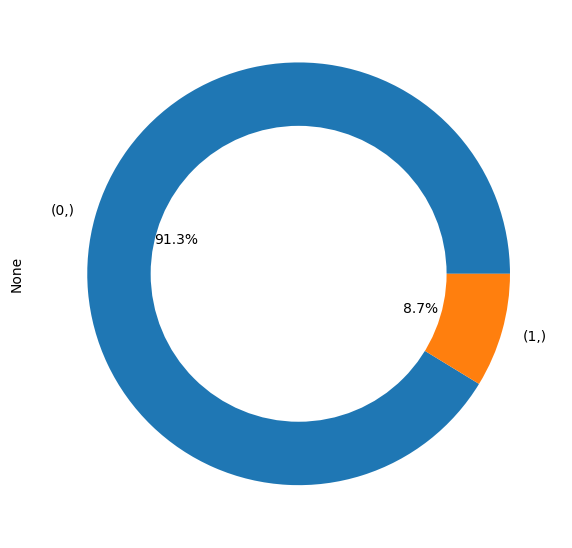

In [87]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [88]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
x_train,y_train = over.fit_resample(x_train, y_train)

In [89]:
y_train.value_counts()

flag_kredit_macet
0                    11313
1                    11313
dtype: int64

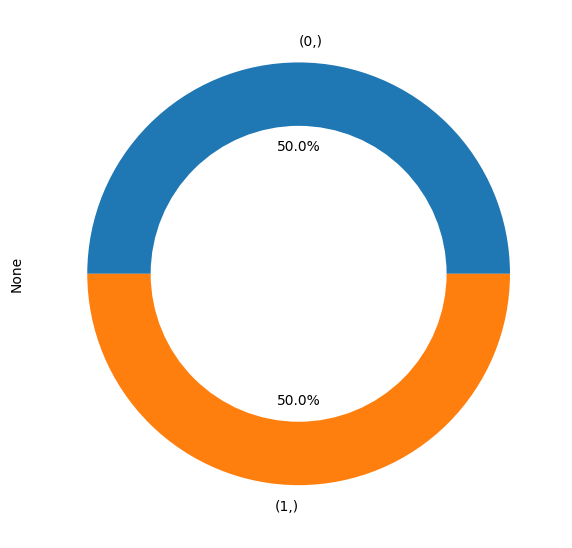

In [90]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

## Melakukan Klasifikasi dengan Berbagai Model

### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred)*100 #buat skor akurasi dengan membandingkan hasil prediksi dengan data

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 81.12294288480155
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2821
           1       0.16      0.27      0.20       278

    accuracy                           0.81      3099
   macro avg       0.54      0.57      0.55      3099
weighted avg       0.85      0.81      0.83      3099

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, Y_pred, algoritma = "Naive Bayes", penanganan='dibiarkan', oversampling = 1), ignore_index=True)

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, pred_cv_tree))

Akurasi 82.73636656986125
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2821
           1       0.23      0.38      0.28       278

    accuracy                           0.83      3099
   macro avg       0.58      0.63      0.59      3099
weighted avg       0.87      0.83      0.85      3099



In [94]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, algoritma = "Decision Tree", penanganan='dibiarkan', oversampling = 1), ignore_index=True)

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

/tmp/ipykernel_807/2231382344.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)
akurasi: 81.44562762181349
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2821
           1       0.25      0.53      0.34       278

    accuracy                           0.81      3099
   macro avg       0.60      0.69      0.62      3099
weighted avg       0.89      0.81      0.84      3099



In [96]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_forest, algoritma = "Random Forest", penanganan='dibiarkan', oversampling = 1), ignore_index=True)

### XGBoost

In [97]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  87.93159083575347
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2821
           1       0.34      0.35      0.34       278

    accuracy                           0.88      3099
   macro avg       0.64      0.64      0.64      3099
weighted avg       0.88      0.88      0.88      3099



In [98]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, algoritma = "XGBoost", penanganan='dibiarkan', oversampling = 1), ignore_index=True)

In [99]:
hasil

,Algoritma,Penanganan Kode Cabang,Oversampling,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,Naive Bayes,dibiarkan,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,Decision Tree,dibiarkan,0,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,Random Forest,dibiarkan,0,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGBoost,dibiarkan,0,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,Naive Bayes,drop,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
5,Decision Tree,drop,0,0.862214,0.924167,0.231047,0.577607,0.861990,0.924495,0.230216,0.577355,0.862214,0.862102,0.577481,0.862102
6,Random Forest,drop,0,0.911907,0.914714,0.592593,0.753653,0.885817,0.996101,0.057554,0.526827,0.911907,0.877535,0.529296,0.877535
7,XGBoost,drop,0,0.912552,0.923307,0.540230,0.731768,0.888942,0.985821,0.169065,0.577443,0.912552,0.891104,0.605537,0.891104
8,Naive Bayes,modus,0,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
9,Decision Tree,modus,0,0.864150,0.923430,0.230189,0.576809,0.861242,0.927685,0.219424,0.573555,0.864150,0.862680,0.575115,0.862680


Terlihat bahwa ketika dilakukan oversampling pada data train ternyata seluruh metrik secara keseluruhan memiliki penurunan, kecuali recall_1 yaitu kemampuan model mendeteksi seluruh data yang kredit macet

In [100]:
hasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Algoritma               20 non-null     object 
 1   Penanganan Kode Cabang  20 non-null     object 
 2   Oversampling            20 non-null     object 
 3   Akurasi                 20 non-null     float64
 4   Precision_0             20 non-null     float64
 5   Precision_1             20 non-null     float64
 6   Macro_Avg_Precision     20 non-null     float64
 7   Weighted_Avg_Precision  20 non-null     float64
 8   Recall_0                20 non-null     float64
 9   Recall_1                20 non-null     float64
 10  Macro_Avg_Recall        20 non-null     float64
 11  Weighted_Avg_Recall     20 non-null     float64
 12  F1_Score                20 non-null     float64
 13  Macro_Avg_F1            20 non-null     float64
 14  Weighted_Avg_F1         20 non-null     floa

In [101]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                     importance
rasio_pembayaran                       0.105952
kode_cabang_B                          0.084846
kode_cabang_I                          0.081600
kode_cabang_F                          0.068196
kode_cabang_J                          0.066411
kode_cabang_C                          0.059491
kode_cabang_G                          0.055634
kode_cabang_E                          0.052112
total_pemakaian_retail                 0.046145
kode_cabang_H                          0.045647
kode_cabang_D                          0.042815
kode_cabang_A                          0.038965
persentasi_overlimit                   0.037616
kode_cabang_K                          0.031198
total_pemakaian_per_limit              0.025892
rasio_pembayaran_3bulan                0.017570
sisa_tagihan_per_jumlah_kartu          0.014313
total_pemakaian_tunai                  0.011721
tagihan                                0.011350
sisa_tagihan_tidak_terbayar            0

<AxesSubplot: >

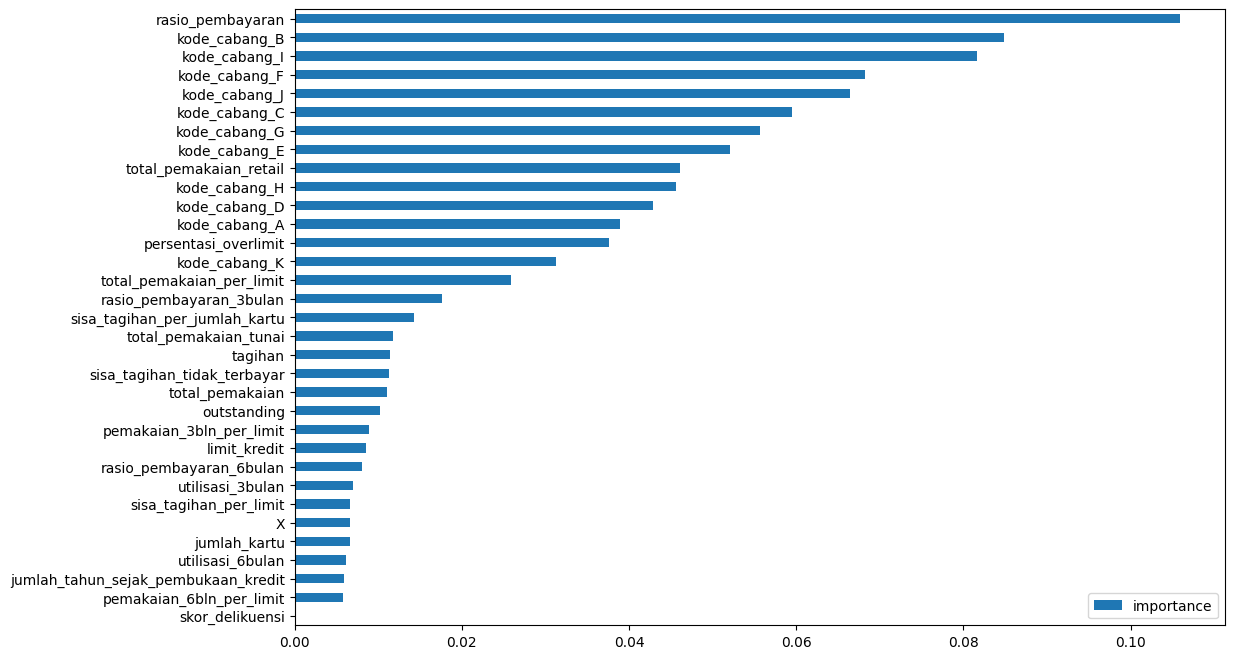

In [102]:
feature_importances = feature_importances.sort_values(by='importance', ascending=True)

feature_importances.plot(kind='barh', figsize=(12, 8))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d43b66c9-546b-4310-9ebd-14779535929d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>